# Data Analysis

In [14]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

### Arduino Device

In [15]:
data_path = "../data/arduino_device/"
# date = "2023_03_07"
date = "2023_04_14"
rec = 11

# Acceleration data
acc_data = pd.read_csv(os.path.join(data_path, date, "DATA" + str(rec) + ".TXT"), sep=";", header=1, names=["ax", "ay", "az"])

FileNotFoundError: [Errno 2] No such file or directory: '../data/arduino_device/2023_04_14/DATA51.TXT'

## Acceleration Data

In [ ]:
acc_data

,ax,ay,az
0,0,4,-194
1,-3,-1,-193
2,-3,0,-189
3,3,1,-182
4,-5,3,-182
...,...,...,...
211,-49,69,-121
212,-23,75,-113
213,-29,66,-83
214,-38,52,-112


In [ ]:
# Convert to g ??
acc_data = acc_data / 16384

In [ ]:
acc_data.describe()

,ax,ay,az
count,216.000000,216.000000,216.000000
mean,-0.000031,-0.000033,-0.008208
std,0.017484,0.025466,0.022987
min,-0.043884,-0.118164,-0.119812
25%,-0.008499,-0.010513,-0.013611
50%,-0.003296,0.004486,-0.008484
75%,0.006226,0.014297,-0.005844
max,0.066956,0.071960,0.184265


In [ ]:
# acc_data.hist(column="ax")

In [ ]:
acc_data.isna().sum()

ax    0
ay    0
az    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

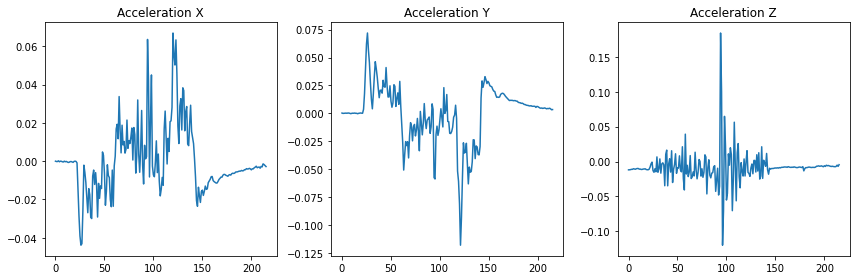

In [ ]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [ ]:
def singleGraph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def tripleGraph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=1080/2, width=1920/2, title_text="Test")
    return fig

In [ ]:
# fig = singleGraph(acc_data[["ax", "ay", "az", "norm"]])
fig = singleGraph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [ ]:
fig = tripleGraph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()